## What Are Embeddings?

Think of embeddings as a way to translate words into a language and computers understand - numbers!

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

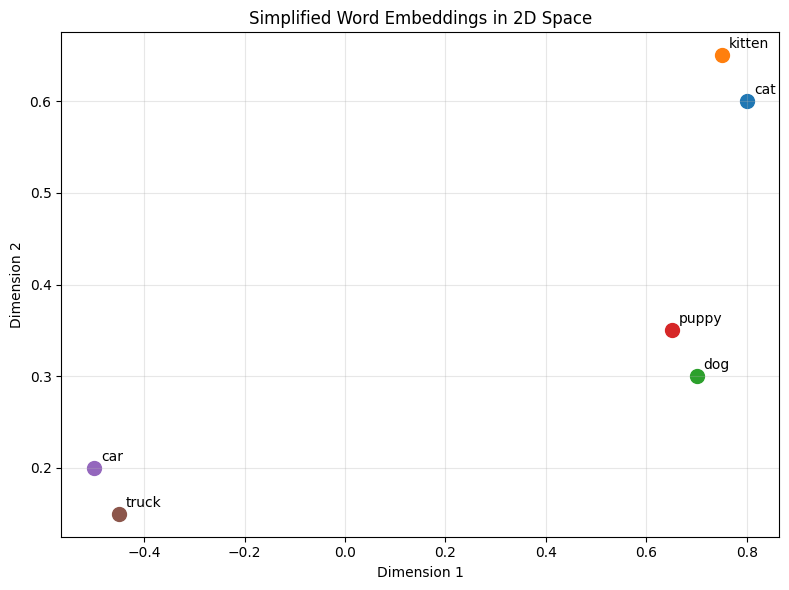

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a =  np.linalg.norm(vec1)
    norm_b =  np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_simialrity = cosine_similarity(cat_vector, kitten_vector)
print(cat_kitten_simialrity)

0.9966186334192181


In [7]:
cosine_similarity(cat_vector, car_vector)

np.float64(-0.43718588548916804)

### Creating Your First Embedding

In [9]:
## Huggingface and OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed)
embeddings = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)

embeddings

d:\Learning_RAG\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\venke\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTT

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [10]:
## Create your first embeddings
text = "Hello, I am learning about embeddings"

embedding =  embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length: {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embeddings
Embedding length: 384
[-0.016661616042256355, -0.09771723300218582, 0.0019201157847419381, -0.0016134831821545959, 0.014046630822122097, 0.060839224606752396, 0.012283592484891415, 0.01574544608592987, 0.04093797877430916, -0.030124587938189507, 0.026265151798725128, 0.06559301912784576, 0.045701708644628525, 0.00889707449823618, -0.04620600491762161, 0.019462525844573975, 0.04677305370569229, 0.07357386499643326, -0.07927090674638748, -0.006600871682167053, -0.0338396355509758, -0.04663924127817154, 0.010644818656146526, -0.09673546254634857, 0.024105312302708626, -0.025333039462566376, -0.021411197260022163, 0.059114888310432434, 0.10023824125528336, -0.06024157628417015, 0.03970737010240555, -0.033746298402547836, -0.019574342295527458, 0.066228948533535, -0.06176472082734108, 0.11689268797636032, 0.03955419361591339, -0.0030686224345117807, -0.08189612627029419, -0.0036541312001645565, 0.0280808974057436, 0.025156360119581223, -0.02704868

In [13]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence = embeddings.embed_documents(sentences)
print(embedding_sentence[0])
print(embedding_sentence[1])
print(embedding_sentence[2])

[0.1304018199443817, -0.011870079673826694, -0.028117043897509575, 0.05123865231871605, -0.055974457412958145, 0.030191553756594658, 0.030161289498209953, 0.024698415771126747, -0.01837054081261158, 0.058766793459653854, -0.024953201413154602, 0.060154229402542114, 0.039831772446632385, 0.033230509608983994, -0.061311379075050354, -0.049373116344213486, -0.054863471537828445, -0.04007607698440552, 0.05642912909388542, 0.03915651887655258, -0.03473711013793945, -0.013247688300907612, 0.031966179609298706, -0.06349923461675644, -0.060178592801094055, 0.07823450118303299, -0.028303878381848335, -0.047442834824323654, 0.04035930335521698, -0.006630919873714447, -0.0667409896850586, -0.004191378131508827, -0.025311697274446487, 0.05334167554974556, 0.01742810569703579, -0.09792357683181763, 0.0060613094829022884, -0.06524166464805603, 0.045572612434625626, 0.023641791194677353, 0.07658486068248749, -0.010264341719448566, -0.004076797515153885, -0.06232282146811485, 0.03370526060461998, 0.01

In [14]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

